In [48]:
#Read wide table from one drive
widecsv=read.csv("Fig. 2F FI.csv", sep=",")
## change the name also in export file
#rotate from wide table to tall table
tallcsv <- stack(widecsv)

#change column name
names(tallcsv)[1] <- ("VALUE")
names(tallcsv)[2] <- ("Treatment")

#add new column for Trial
tallcsv$Trial <- "One"

#change different trial using each n of each trial
## Trial "One" max n: 6 // Trial "Two" max n: 6
### you can modify this "for loop" using rest of dividing 
for(i in 1:nrow(tallcsv))
  if(i%%12< 7 & i%%12 > 0){
    tallcsv[i,3] <- "One"
  } 
for(i in 1:nrow(tallcsv))
  if(i%%12 >= 8 | i%%12 == 0){
    tallcsv[i,3] <- "Two"
  } 
print(tallcsv)

#delete NA row
tallcsv2 <- tallcsv[!is.na(tallcsv$VALUE),]
#change column location
tallcsv3 <- data.frame(tallcsv2[2],tallcsv2[1],tallcsv2[3])

#export
write.csv(tallcsv3,"Fig. 2F FI_tall.csv", row.names = FALSE)



          VALUE        Treatment Trial
1    16331.8400         X01_DMSO   One
2    15204.0600         X01_DMSO   One
3     1370.4140         X01_DMSO   One
4     1243.6010         X01_DMSO   One
5            NA         X01_DMSO   One
6            NA         X01_DMSO   One
7            NA         X01_DMSO   One
8     1560.6560         X01_DMSO   Two
9     2619.5040         X01_DMSO   Two
10     565.2588         X01_DMSO   Two
11    1750.9170         X01_DMSO   Two
12           NA         X01_DMSO   Two
13    4373.1820   X02_flg20_1_nM   One
14   30744.6600   X02_flg20_1_nM   One
15    4916.3560   X02_flg20_1_nM   One
16   55026.4400   X02_flg20_1_nM   One
17           NA   X02_flg20_1_nM   One
18           NA   X02_flg20_1_nM   One
19           NA   X02_flg20_1_nM   One
20    9887.8460   X02_flg20_1_nM   Two
21    6209.6300   X02_flg20_1_nM   Two
22   12353.0400   X02_flg20_1_nM   Two
23    8660.8210   X02_flg20_1_nM   Two
24           NA   X02_flg20_1_nM   Two
25    1406.2610 X03_Maya2

In [49]:
#load the required packages
library(car)
library(MASS)
library(stats)
library(sjPlot)
library(tidyverse)
library(lme4)
library(lmerTest)
library(LMERConvenienceFunctions)
library(multcomp)

In [50]:
#VALUEdata=read.csv(choose.files())
VALUEdata=read.csv("Fig. 2F FI_tall.csv", sep=",")
VALUEdata$VALUE <- as.numeric(as.character(VALUEdata$VALUE))

print(head(VALUEdata))

  Treatment     VALUE Trial
1  X01_DMSO 16331.840   One
2  X01_DMSO 15204.060   One
3  X01_DMSO  1370.414   One
4  X01_DMSO  1243.601   One
5  X01_DMSO  1560.656   Two
6  X01_DMSO  2619.504   Two


[1] 47 52

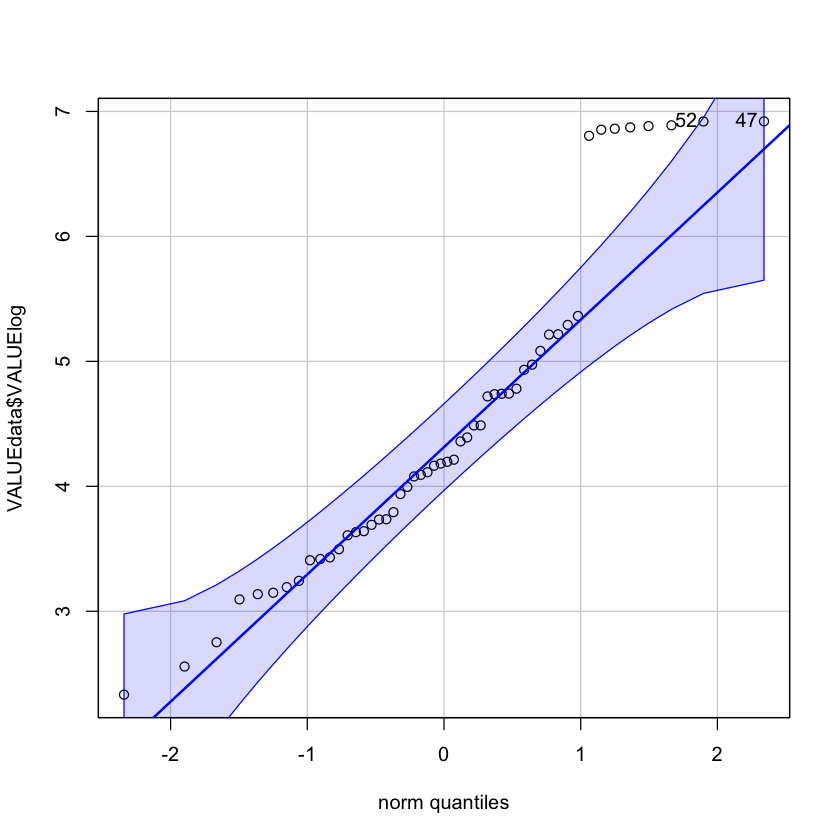

In [51]:
#Normal distribution and log converted
VALUEdata$VALUElog <- log10(VALUEdata$VALUE)
qqp(VALUEdata$VALUElog, "norm")

Warning message:
“Model was not fitted by REML. Re-fitting model using REML, but p-values, df, etc. still might be unreliable.”


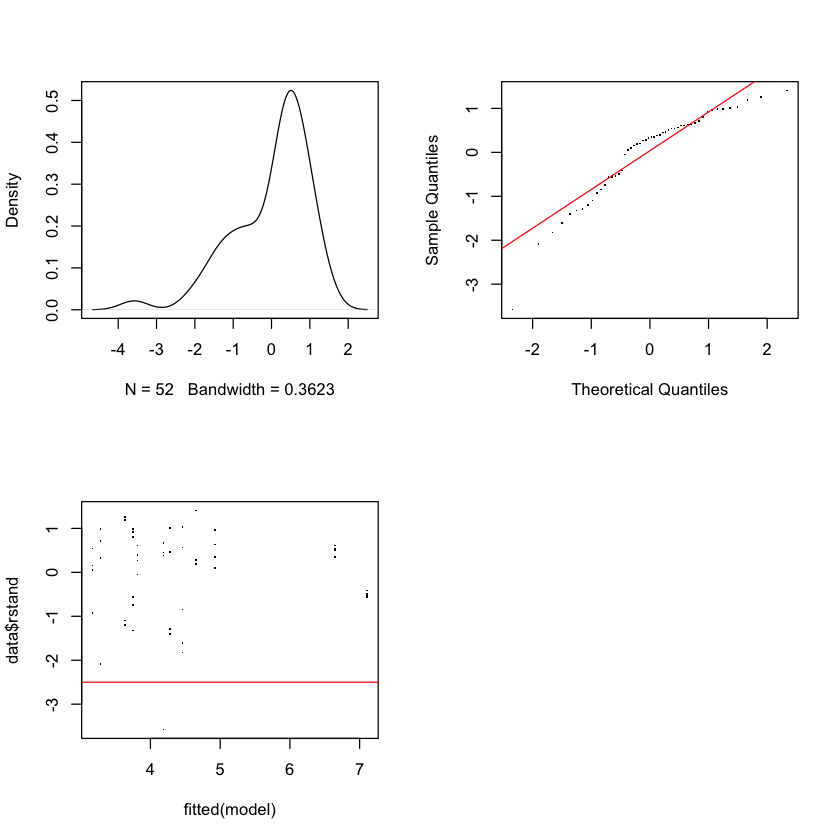

In [52]:
#set REML to FALSE if the data is normal, so we can use the maximum likelihood because the data are normal, we have similar sample sizes between effects, and we only have one random effect
VALUElog.lmm<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
m<-lmer(VALUElog ~ Treatment + (1|Trial), data = VALUEdata, REML = FALSE)
tab_model(m, p.val = "kr", show.df = TRUE)
#the density plot should look roughly normal, centered on 0. In the quantile plot the black dots should roughly mirror the red line. And in the fitted residual plot most black dots should be between the red lines, with no obvious skew from left to right.
mcp.fnc(VALUElog.lmm)

In [53]:
#If the above looks good, then we can get the model characteristics
summary(VALUElog.lmm)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: VALUElog ~ Treatment + (1 | Trial)
   Data: VALUEdata

     AIC      BIC   logLik deviance df.resid 
    86.7    102.3    -35.4     70.7       44 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5525 -0.5531  0.3302  0.6269  1.3981 

Random effects:
 Groups   Name        Variance Std.Dev.
 Trial    (Intercept) 0.06124  0.2475  
 Residual             0.21006  0.4583  
Number of obs: 52, groups:  Trial, 2

Fixed effects:
                          Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)                 3.4042     0.2385  5.2900  14.274 2.00e-05 ***
TreatmentX02_flg20_1_nM     0.6431     0.2292 49.9970   2.806  0.00712 ** 
TreatmentX03_Maya2_100_nM   0.1127     0.2177 50.0371   0.517  0.60713    
TreatmentX04_Maya2_1_uM     1.0143     0.2292 49.9970   4.426 5.21e-05 ***
TreatmentX05_Maya2_10_uM    1.2907     0.2174 49.9970   5.937 2.74e-07 ***


In [54]:
#anova analysis of lmm
aov <- anova(m)
print(summary(aov))
#Tukey's post-hoc, load library multcomp
tukey_result <- glht(m, linfct = mcp(Treatment = "Tukey"))
multcomps <- cld(tukey_result)
print(multcomps)
print(summary(tukey_result))

     Sum Sq         Mean Sq          NumDF       DenDF          F value     
 Min.   :66.36   Min.   :13.27   Min.   :5   Min.   :50.01   Min.   :63.18  
 1st Qu.:66.36   1st Qu.:13.27   1st Qu.:5   1st Qu.:50.01   1st Qu.:63.18  
 Median :66.36   Median :13.27   Median :5   Median :50.01   Median :63.18  
 Mean   :66.36   Mean   :13.27   Mean   :5   Mean   :50.01   Mean   :63.18  
 3rd Qu.:66.36   3rd Qu.:13.27   3rd Qu.:5   3rd Qu.:50.01   3rd Qu.:63.18  
 Max.   :66.36   Max.   :13.27   Max.   :5   Max.   :50.01   Max.   :63.18  
     Pr(>F)         
 Min.   :1.996e-20  
 1st Qu.:1.996e-20  
 Median :1.996e-20  
 Mean   :1.996e-20  
 3rd Qu.:1.996e-20  
 Max.   :1.996e-20  
        X01_DMSO   X02_flg20_1_nM X03_Maya2_100_nM   X04_Maya2_1_uM 
             "a"             "ab"              "a"             "bc" 
 X05_Maya2_10_uM   X06_flg22_1_nM 
             "c"              "d" 

	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: